In [1]:
# GeoPandas kütüphanesini çağırma
import geopandas

# Veri setlerini okutma
boroughs = geopandas.read_file('data/Borough Boundaries.geojson')
subway_stations = geopandas.read_file('data/Subway Stations.geojson')

In [2]:
boroughs

boro_code      boro_name     shape_area     shape_leng  \
0         5  Staten Island  1623620725.06  325917.353702   
1         2          Bronx  1187174784.85  463179.772813   
2         1      Manhattan  636520830.768  357564.316391   
3         3       Brooklyn  1934143372.64  728197.541089   
4         4         Queens  3041418506.76  888199.731579   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
3  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...

In [3]:
subway_stations.sample(5)

name                                url  \
303                   30th Ave  http://web.mta.info/nyct/service/   
117                  Fulton St  http://web.mta.info/nyct/service/   
469     34th St - Hudson Yards  http://web.mta.info/nyct/service/   
164                    86th St  http://web.mta.info/nyct/service/   
352  59th St - Columbus Circle  http://web.mta.info/nyct/service/   

            line objectid                                              notes  \
303          N-W      304                           N-all times, W part time   
117            G      118                                        G-all times   
469  7-7 Express      470  7-all times, 7 Express-rush hours AM westbound...   
164        A-B-C      165  A-nights, B-weekdays and evenings, C-all times...   
352      A-B-C-D      353  A,D-all times, B-weekdays and evenings, C-all ...   

                       geometry  
303  POINT (-73.92148 40.76678)  
117  POINT (-73.97537 40.68712)  
469  POINT (-74.00220 40.75545)  
164  POINT (-73.96883 40.78582)  
352  POINT (-73.98165 40.76825)

In [4]:
boroughs.shape_area

0    1623620725.06
1    1187174784.85
2    636520830.768
3    1934143372.64
4    3041418506.76
Name: shape_area, dtype: object

In [5]:
# Coğrafi koordinatlardan projeksiyon koordinatlarına dönüşüm
boroughs = boroughs.to_crs('EPSG:2263')
boroughs['area'] = boroughs.area
boroughs['area']

0    1.623623e+09
1    1.187177e+09
2    6.365205e+08
3    1.934143e+09
4    3.041419e+09
Name: area, dtype: float64

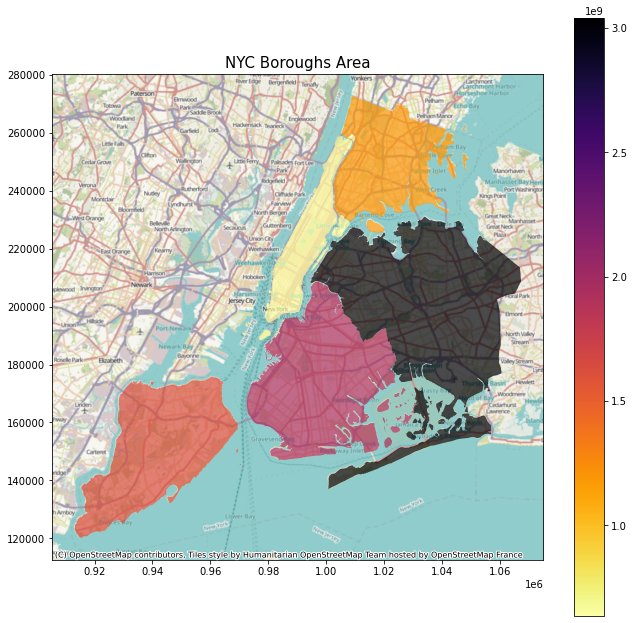

In [6]:
# Haritalara ek görseller eklemek için kullanılan bir kütüphane
import contextily as ctx
import matplotlib.pyplot as plt

# Elimizdeki alan bilgisinin görsel olarak haritaya eklenmesi
boroughs_area = boroughs.plot('area', legend=True, cmap='inferno_r', alpha=0.7, figsize=[11,11])
# Görseli daha anlaşılır kılmak için altlık harita ekleme
ctx.add_basemap(boroughs_area, crs='EPSG:2263', source=ctx.providers.OpenStreetMap.HOT)
plt.title('NYC Boroughs Area', size=15);

In [7]:
boroughs.explore('area', legend=True, cmap='inferno_r', legend_kwds={'max_labels': 3},
                 style_kwds={'fillOpacity': 0.7})

In [8]:
subway_stations = subway_stations.sample(10, random_state=42)
subway_stations

name                                url  \
55                     72nd St  http://web.mta.info/nyct/service/   
73                  Wilson Ave  http://web.mta.info/nyct/service/   
33                     77th St  http://web.mta.info/nyct/service/   
374            Smith - 9th Sts  http://web.mta.info/nyct/service/   
245               Sutphin Blvd  http://web.mta.info/nyct/service/   
296  161st St - Yankee Stadium  http://web.mta.info/nyct/service/   
211      Myrtle - Wyckoff Aves  http://web.mta.info/nyct/service/   
9                      36th St  http://web.mta.info/nyct/service/   
126               Nostrand Ave  http://web.mta.info/nyct/service/   
70                    Broadway  http://web.mta.info/nyct/service/   

              line objectid  \
55           A-B-C       56   
73               L       74   
33   4-6-6 Express       34   
374            F-G      375   
245              F      246   
296            B-D      297   
211              L      212   
9            E-M-R       10   
126            A-C      127   
70               G       71   

                                                 notes  \
55   A-nights, B-weekdays and evenings, C-all times...   
73                                         L-all times   
33   4 nights, 6-all times, 6 Express-weekdays AM s...   
374                                      F,G-all times   
245                                        F-all times   
296  B-rush hours, D-all times, skips rush hours AM...   
211                                        L-all times   
9    E-nights, R-all other times, M-weekdays and ev...   
126                A-all times, C-all times exc nights   
70                                         G-all times   

                       geometry  
55   POINT (-73.97634 40.77552)  
73   POINT (-73.90396 40.68887)  
33   POINT (-73.95987 40.77362)  
374  POINT (-73.99589 40.67364)  
245  POINT (-73.81083 40.70542)  
296  POINT (-73.92565 40.82790)  
211  POINT (-73.91098 40.69947)  
9    POINT (-73.92902 40.75196)  
126  POINT (-73.95043 40.68044)  
70   POINT (-73.95031 40.70613)

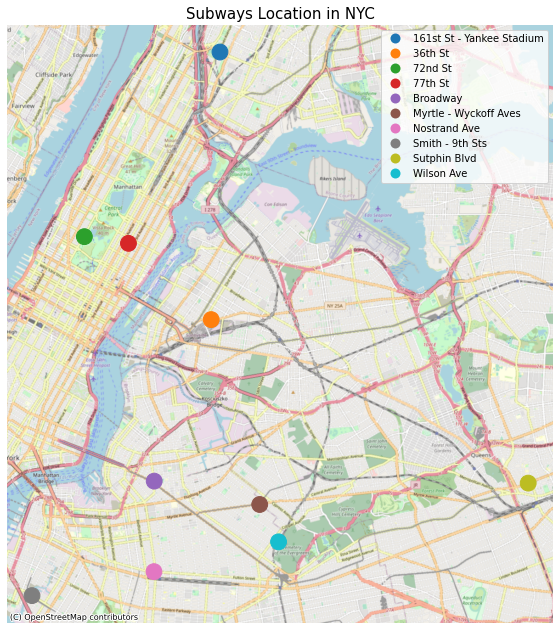

In [9]:
subway_stations = subway_stations.to_crs('EPSG:2263')
subway_locations = subway_stations.plot('name', markersize=250, figsize=[11,11], legend=True)
ctx.add_basemap(subway_locations, crs='EPSG:2263', source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Subways Location in NYC', size=15)
subway_locations.set_axis_off()

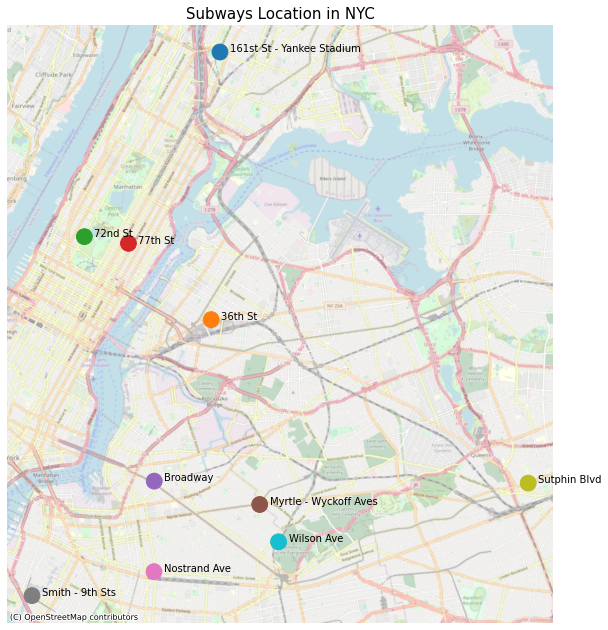

In [10]:
station_names = subway_stations.plot('name', markersize=250, figsize=[11,11])
# İstasyon isimlerini harita eklemek için kod bloğu
for x, y, label in zip(subway_stations.geometry.x, subway_stations.geometry.y, subway_stations['name']):
    station_names.annotate(label, xy=(x, y), xytext=(10, 0), textcoords="offset points")
ctx.add_basemap(station_names, crs='EPSG:2263', source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.7)
plt.title('Subways Location in NYC', size=15)
station_names.set_axis_off()

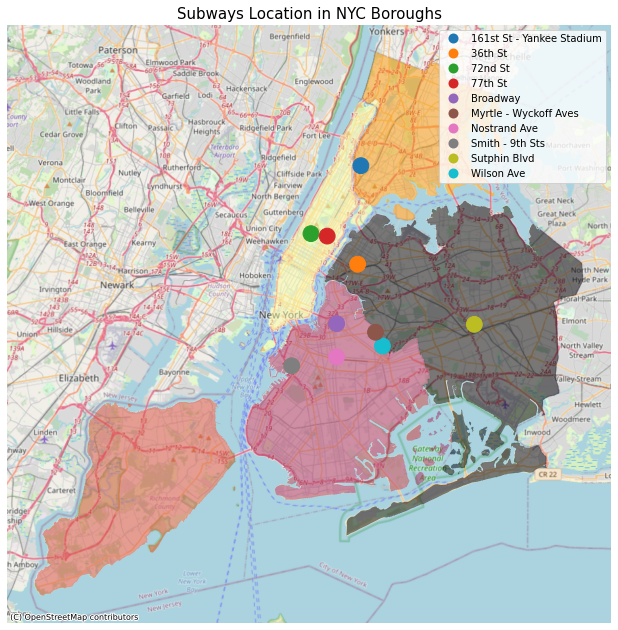

In [11]:
fig, ax = plt.subplots(figsize=[11,11])
boroughs.plot('area', cmap='inferno_r', ax=ax, alpha=0.5)
subway_stations.plot('name', markersize=250, ax=ax, legend=True)
ctx.add_basemap(ax, crs='EPSG:2263', source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Subways Location in NYC Boroughs', size=15)
ax.set_axis_off()

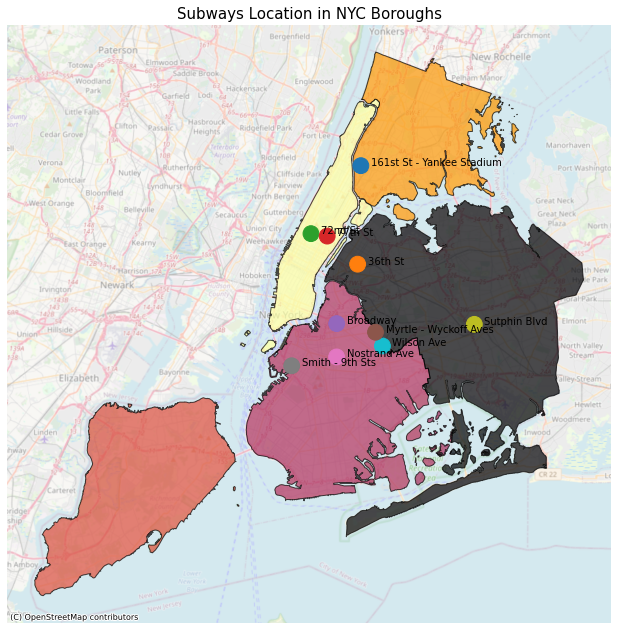

In [13]:
fig, ax = plt.subplots(figsize=[11,11])
boroughs.plot('area', cmap='inferno_r', ax=ax, alpha=0.7, edgecolor='black')

station_names = subway_stations.plot('name', markersize=250, ax=ax, figsize=[11,11])
for x, y, label in zip(subway_stations.geometry.x, subway_stations.geometry.y, subway_stations['name']):
    station_names.annotate(label, xy=(x, y), xytext=(10, 0), textcoords="offset points")
    
ctx.add_basemap(ax, crs='EPSG:2263', source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)
plt.title('Subways Location in NYC Boroughs', size=15)
ax.set_axis_off()